In [ ]:
# default_exp gbe.ema_drinking

# EMA drinking

In [ ]:
update_all_data = False

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext rpy2.ipython
import seaborn as sns
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.3, rc=custom_params)

In [ ]:
#export
%load_ext autoreload
%autoreload 2
from trr265.gbe.ist.data_provider import ISTDataProvider
from trr265.gbe.wm.data_provider import WMDataProvider
from trr265.gbe.sst.data_provider import SSTDataProvider
from trr265.gbe.rtt.data_provider import RTTDataProvider

import trr265.gbe.ist.scoring as ist_scoring 
import trr265.gbe.wm.scoring as wm_scoring 
import trr265.gbe.sst.scoring as sst_scoring 
import trr265.gbe.rtt.scoring as rtt_scoring 

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data
In this notebook, all tests and examples are run on the initial baseline dataset.

### Information sampling task

In [ ]:
# Getting raw data
dp = ISTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_ist_data(update = update_all_data)
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline'], update = update_all_data), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
#df = df.query("is_initial and (is_baseline==False)")
df = df.query("is_baseline==False")

ist = ist_scoring.get_oversampling_predicted_joint(df)[0]
#ist = ist.merge(dp.get_gbe_data(columns = ['participant','session_number']), left_on = 'gbe_index', right_index = True, how = 'left')
#ist = ist.groupby('participant').mean()
ist = ist.rename(columns = {"oversampling_predicted_joint":"ist_oversampling"})

R[write to console]: Lade nötiges Paket: lme4

R[write to console]: Lade nötiges Paket: Matrix

R[write to console]: 
Attache Paket: ‘lmerTest’


R[write to console]: Das folgende Objekt ist maskiert ‘package:lme4’:

    lmer


R[write to console]: Das folgende Objekt ist maskiert ‘package:stats’:

    step




### Working memory task

In [ ]:
# Getting raw data
dp = WMDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_wm_data(update = update_all_data)
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_baseline==False")
# Filtering participants with old app
df = dp.filter_old_app_sessions(df)
df = dp.filter_level_two_failures(df)
wm = wm_scoring.get_perc_correct_predicted_sep_trial(df)[0]
#wm = wm.merge(dp.get_gbe_data(columns = ['participant','session_number']), left_on = 'gbe_index', right_index = True, how = 'left')
wm = wm.rename(columns={'perc_predicted_sep_trial_no_distractor_1': 'wm_no_1',
                       'perc_predicted_sep_trial_no_distractor_2': 'wm_no_2',
                       'perc_predicted_sep_trial_encoding_distractor': 'wm_encoding',
                       'perc_predicted_sep_trial_delayed_distractor':'wm_delayed'})

5 participants used an old version of the task in some of their sessions.  23 sessions (0.61%) were removed from the dataset.
37 sessions (0.98%) were removed because participants failed a level two trial.


### Risk taking task

In [ ]:
# Getting raw data
dp = RTTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_rtt_data(update = update_all_data)
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_baseline==False")
rtt = rtt_scoring.get_perc_gamble_predicted_joint(df)[0]
#rtt = rtt.merge(dp.get_gbe_data(columns = ['participant','session_number']), left_on = 'gbe_index', right_index = True, how = 'left')
rtt = rtt.rename(columns={'perc_gamble_joint_win': 'rtt_win',
                       'perc_gamble_joint_loss': 'rtt_loss',
                       'perc_gamble_joint_mixed': 'rtt_mixed'})

### Stop signal task

In [ ]:
# Getting raw data
dp = SSTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_sst_data(update = update_all_data)
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_baseline==False")
sst = sst_scoring.get_ssrt_predicted_joint(df)[0]
#sst = sst.merge(dp.get_gbe_data(columns = ['participant','session_number']), left_on = 'gbe_index', right_index = True, how = 'left')
sst = sst.rename(columns = {'ssrt_predicted_joint':'ssrt'})

In [ ]:
sst.to_csv('../data/processed/sst_predicted_joint_longitudinal.csv')
wm.to_csv('../data/processed/wm_predicted_joint_longitudinal.csv')
rtt.to_csv('../data/processed/rtt_predicted_joint_longitudinal.csv')
ist.to_csv('../data/processed/ist_predicted_joint_longitudinal.csv')

### Drinking

### AUD criteria

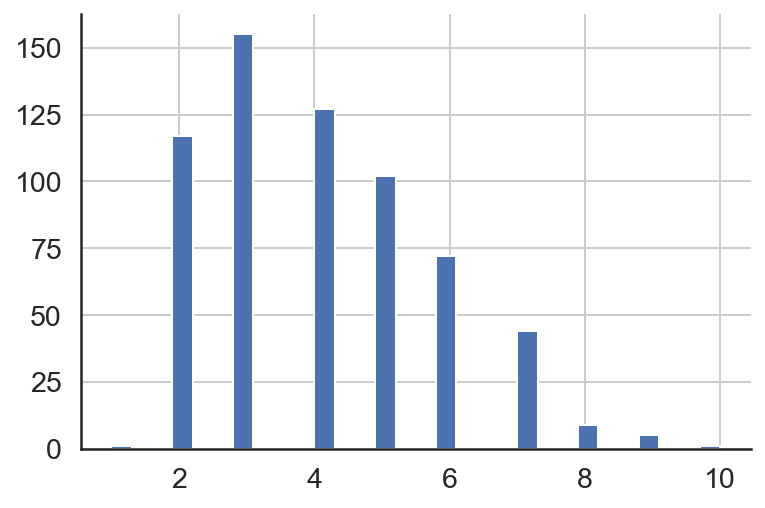

In [ ]:
ba = dp.get_ba_data().query("redcap_event_name=='erhebungszeitpunkt_arm_1'")
#ba = ba[ba.mov_id.isin(initial_participants)]
aud = ba[~ba.bx_aud_sum.isnull()][['mov_id','bx_aud_sum']]
aud.columns = ['participant','aud']
aud = aud.groupby('participant').first()
aud.aud.hist(bins = 30)
sns.despine()

### Drinking days
16 participants did not report to drink any alcohol during the first EMA month.

In [ ]:
two_day = dp.get_two_day_data(update = update_all_data)
#drinking_days = two_day.query("sampling_day<30")#.groupby('participant').g_alc.agg(['mean','median'])
#drinking_days['drinking_days'] = ema_drinking.g_alc>0
#drinking_days = drinking_days.groupby('participant')[['g_alc','drinking_days']].sum().reset_index()
#drinking_days = drinking_days[drinking_days.participant.isin(initial_participants)].set_index('participant')

### Participant numbers

In [ ]:
tasks = pd.concat([wm, sst, rtt,ist],axis = 1).dropna(how = 'all')
tasks = tasks.merge(dp.get_gbe_data(columns = ['participant','redcap_id','session_number']), left_on = 'gbe_index', right_index = True, how = 'left')
tasks = tasks.loc[:,~tasks.columns.duplicated()]
gbe = dp.get_gbe_data()
tasks['date'] = pd.to_datetime(gbe.date)

In [ ]:
#initial = pd.read_csv('../data/interim/initial_participants.csv')
#initial_participants = initial['participant']

#### Data from global dataset

In [ ]:
# Data from global dataset
gba = pd.read_stata('/Users/hilmarzech/Projects/trr265/trr265/data/raw/TRR265_PID78_20220623/BA_S01_t0.dta',convert_categoricals=False).query('t0_dashboard_aud==1')

In [ ]:
'''In total %d participants have been included in the study by 23.06.22.'''%len(gba.participant_id.unique())

'In total 643 participants have been included in the study by 23.06.22.'

In [ ]:
gba['missing_mov_id'] = gba.t0_bx_movisens.isna()
gba['center'] = gba.t0_bx_center.replace({1:'berlin',2:'dresden',3:'mannheim'})

In [ ]:
gba.groupby('center').missing_mov_id.sum()

center
berlin      22
dresden     18
mannheim     3
Name: missing_mov_id, dtype: int64

In [ ]:
'''Some participants were included although they did not receive a movisens ID.  Only counting participants with movisens ID, we have %d participants'''%(gba.missing_mov_id==0).sum()

'Some participants were included although they did not receive a movisens ID.  Only counting participants with movisens ID, we have 600 participants'

In [ ]:
two_day_data = dp.get_two_day_data()
'''We have longitudinal data from %d participants.'''%len(two_day_data.participant.unique())

'We have longitudinal data from 595 participants.'

In [ ]:
len(tasks)

3851

In [ ]:
'Of these %d participants have longitudinal task data (in total %d sessions).'%(len(tasks.participant.unique()), len(tasks))

'Of these 533 participants have longitudinal task data (in total 3851 sessions).'

ToDo: Find out what happened to the remaining participants.

In [ ]:
import datetime
gba['starting_date'] = pd.to_datetime(gba.t0_bx_date)
gba['days_since_start'] = (datetime.datetime.now() - gba.starting_date).dt.days

In [ ]:
gba_finished = gba.query('days_since_start>365').query('missing_mov_id==0')
'''%d participants (with movisens IDs) have already finished the study.'''%len(gba_finished.participant_id.unique())

'384 participants (with movisens IDs) have already finished the study.'

In [ ]:
tasks_finished = tasks[tasks.redcap_id.isin(gba_finished.participant_id.unique())]

In [ ]:
'''Of these participants %d have longitudinal task data (in total %d sessions).'''%(len(tasks_finished.participant.unique()), len(tasks_finished))

'Of these participants 340 have longitudinal task data (in total 2938 sessions).'

In [ ]:
initial_participants = gba[gba.participant_id.isin(tasks_finished.redcap_id)].sort_values(by='starting_date').reset_index().iloc[:300].participant_id

The initial sample was completed on 28.06.2022.

In [ ]:
initial_task_data = tasks[tasks.redcap_id.isin(initial_participants)]
'''In the initial sample, there are %d participants (in total %d sessions).'''%(len(initial_task_data.participant.unique()), len(initial_task_data))

'In the initial sample, there are 300 participants (in total 2629 sessions).'

In [ ]:
gba[(gba.participant_id.isin(tasks_finished.redcap_id)) & (gba.participant_id.isin(initial_participants))].starting_date.max()

Timestamp('2021-06-28 00:00:00')

In [ ]:
gba[(gba.participant_id.isin(tasks_finished.redcap_id)) &(gba.participant_id.isin(initial_participants)==False)].starting_date.min()

Timestamp('2021-06-28 00:00:00')